In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# %% load the data
data = np.genfromtxt('assignment1_data.csv',delimiter=',')
x = data[:,0]
y = data[:,1]
N = len(x)

# %% create known statistics and cost contour plot
r_yx = np.array([[1],[5.3],[-3.9]])
R_x = np.array([[5,-1,-2],[-1,5,-1],[-2,-1,5]])

# cost contour plot
no_samples = 100
samples = np.arange(no_samples)/no_samples * 2.5 -0.5

J = np.zeros((no_samples,no_samples))

# populate J using for loops (you could vectorize this for speed, but we choose for readability here)
w2 = -0.5
for i,w0 in enumerate(samples):
    for j,w1 in enumerate(samples):
        # get the weights matrix at this positions
        w = np.array([[w0],[w1],[w2]])

        # calculate the cost
        J[i,j] = -2 * w.transpose() @ r_yx + w.transpose() @ R_x @ w
        # J = - w^T * r_yx - r_yx^T * w + w^T * Rx * w


# create meshgrids for plotting (make sure to use 'ij' indexing)
W0,W1 = np.meshgrid(samples,samples, indexing='ij')

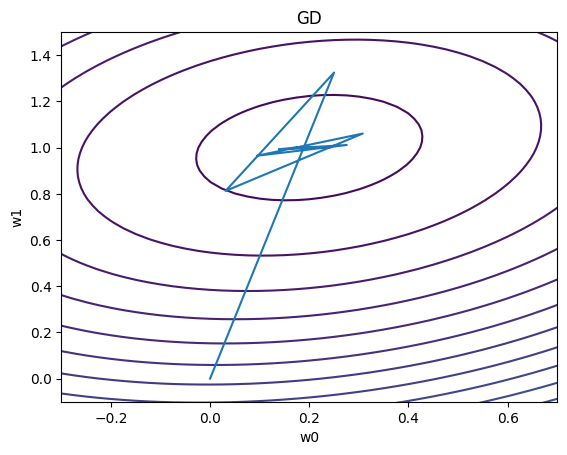

In [3]:
# %% exercise 2: GD
# input parameters
a = 0.125

# initialize the weights
w = np.zeros((3,1)) # w0, w1. w2
w_history = np.zeros((3,N))

# loop over all the samples (We have to skip the first two, because of filter size 3)
for i in range(2,N):
    # save the current weights
    w_history[:,i] = w[:,0]

    # update rule
    w = w + 2*a*(r_yx - R_x @ w) # '@' denotes matrix multiplication in python
    # w[k+1] = w[k] + 2*alpha*(r_yx - Rx*w[k])


# plot!
plt.figure()
plt.contour(W0, W1, J, levels = 40)
plt.plot(w_history[0,:],w_history[1,:])
plt.xlim(-0.3,0.7)
plt.ylim(-0.1,1.5)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('GD')
plt.savefig("figures/exercise_2.png",dpi=300)
plt.show()

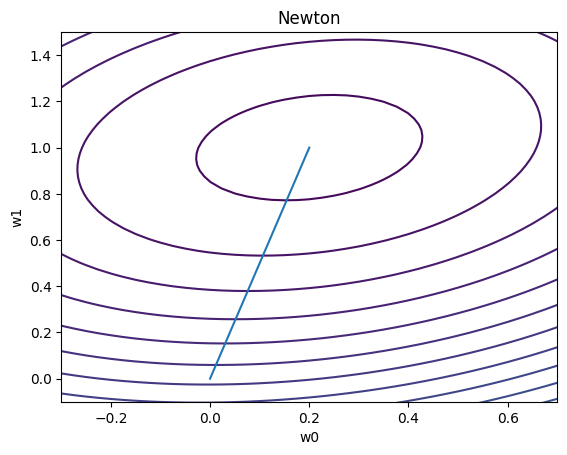

In [4]:
# %% exercise 3: Newton
# input parameters
a = 0.5

# initialize the weights
w = np.zeros((3,1))
w_history = np.zeros((3,N))

# inverse autocorrelation matrix
R_x_inv = np.linalg.inv(R_x)

# loop over all the samples (We have to skip the first two, because of filter size 3)
for i in range(2,N):
    # save the current weights
    w_history[:,i] = w[:,0]

    # update rule
    w = w + 2*a*R_x_inv@(r_yx - R_x @ w) # '@' denotes matrix multiplication in python


# plot!
plt.figure()
plt.contour(W0, W1, J, levels = 40)
plt.plot(w_history[0,:],w_history[1,:])
plt.xlim(-0.3,0.7)
plt.ylim(-0.1,1.5)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('Newton')
plt.savefig("figures/exercise_3.png",dpi=300)
plt.show()

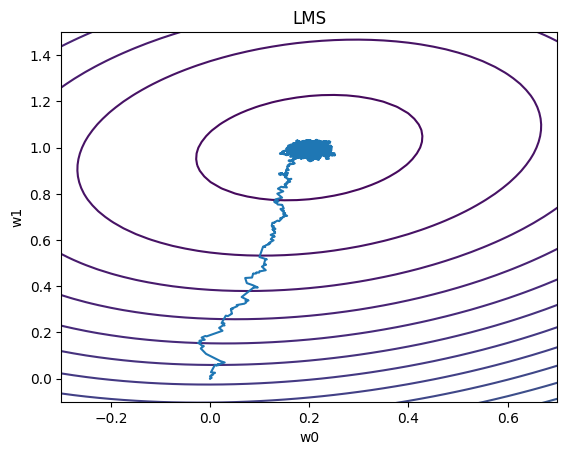

In [5]:
# %% exercise 4a: LMS
# input parameters
a = 0.001

# initialize the weights
w = np.zeros((3,1))
w_history = np.zeros((3,N))

# loop over all the samples (We have to skip the first two, because of filter size 3)
for i in range(2,N):
    # save the current weights
    w_history[:,i] = w[:,0]

    # get the current x
    x_here = x[i-2:i+1]

    # reverse ordering of x (filter weight w0 applies to the latest sample of x)
    x_here = x_here[::-1]

    # expand x to work with vector convention
    x_here = x_here.reshape(3,1)

    # calculate y_hat
    y_hat = w.transpose() @ x_here

    #get the error
    e = y[i]-y_hat

    # update rule
    w = w + 2*a*x_here*e


# plot!
plt.figure()
plt.contour(W0, W1, J, levels = 40)
plt.plot(w_history[0,:],w_history[1,:])
plt.xlim(-0.3,0.7)
plt.ylim(-0.1,1.5)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('LMS')
plt.savefig("figures/exercise_4a.png",dpi=300)
plt.show()

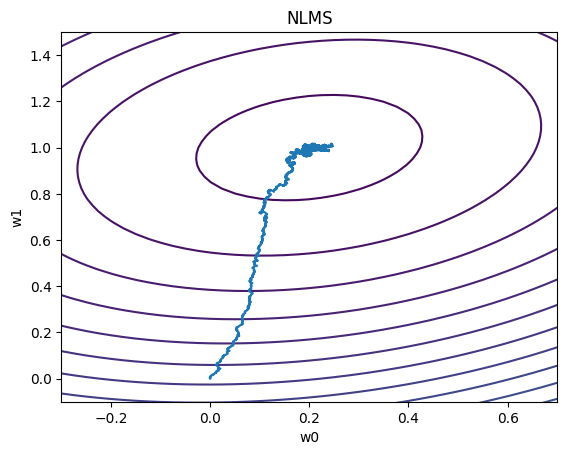

In [6]:
# %% exercise 4b: NLMS
# input parameters
a = 0.001

# initialize the weights
w = np.zeros((3,1))
w_history = np.zeros((3,N))

# loop over all the samples (We have to skip the first two, because of filter size 3)
for i in range(2,N):
    # save the current weights
    w_history[:,i] = w[:,0]

    # get the current x
    x_here = x[i-2:i+1]

    # reverse ordering of x (filter weight w0 applies to the latest sample of x)
    x_here = x_here[::-1]

    # expand x to work with vector convention
    x_here = x_here.reshape(3,1)

    # calculate y_hat
    y_hat = w.transpose() @ x_here

    #get the error
    e = y[i]-y_hat

    # normalization
    simga_x_squared = (x_here.transpose() @ x_here)/3 + 1e-5

    # update rule
    w = w + 2*a/simga_x_squared*x_here*e


# plot!
plt.figure()
plt.contour(W0, W1, J, levels = 40)
plt.plot(w_history[0,:],w_history[1,:])
plt.xlim(-0.3,0.7)
plt.ylim(-0.1,1.5)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('NLMS')
plt.savefig("figures/exercise_4b.png",dpi=300)
plt.show()

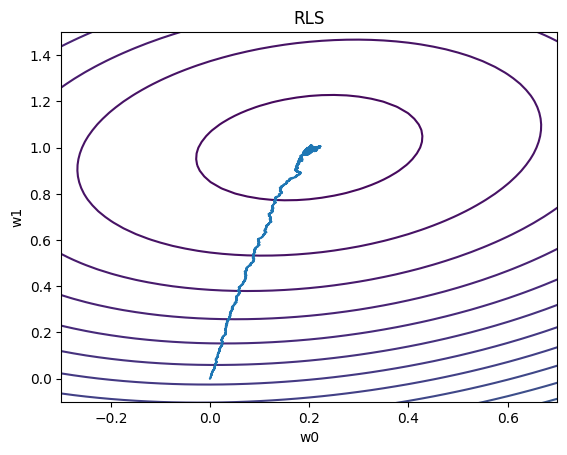

In [7]:
# %% exercise 5: RLS
# input parameters
gamma_squared = 0.999**2

# initialize the weights
w = np.zeros((3,1))
w_history = np.zeros((3,N))

# initialize the estimated statistics
r_yx_estimate = np.zeros((3,1))
R_x_inv_estimate = np.eye(3)*1e-6

# loop over all the samples (We have to skip the first two, because of filter size 3)
for i in range(2,N):
    # save the current weights
    w_history[:,i] = w[:,0]

    # get the current x
    x_here = x[i-2:i+1]

    # reverse ordering of x (filter weight w0 applies to the latest sample of x)
    x_here = x_here[::-1]

    # expand x to work with vector convention
    x_here = x_here.reshape(3,1)

    # calculate g
    g = (R_x_inv_estimate @ x_here) / (gamma_squared + x_here.transpose() @ R_x_inv_estimate @ x_here)

    # update inverse matrix
    R_x_inv_estimate = 1/gamma_squared * ( R_x_inv_estimate - g @  x_here.transpose() @ R_x_inv_estimate)

    # update cross correlation
    r_yx_estimate = gamma_squared*r_yx_estimate + x_here*y[i]

    # update rule
    w = R_x_inv_estimate@r_yx_estimate


# plot!
plt.figure()
plt.contour(W0, W1, J, levels = 40)
plt.plot(w_history[0,:],w_history[1,:])
plt.xlim(-0.3,0.7)
plt.ylim(-0.1,1.5)
plt.xlabel('w0')
plt.ylabel('w1')
plt.title('RLS')
plt.savefig("figures/exercise_5.png",dpi=300)
plt.show()